<a href="https://colab.research.google.com/github/Baishnabi17/Customer-chun-prediction/blob/main/Customer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
#set random seed for reproducibility
np.random.seed(42)
#Number of customer
n_customers=500

#Generate synthetic features
ages=np.random.randint(18,70,n_customers)
income=np.random.normal(50,15,n_customers)
genders=np.random.randint(0,2,n_customers)#0:female,1:male
purchase_freq=np.random.poisson(3,n_customers)#Avg 3 purchase/month

#simulate churn:likely to churn if income<40 and purchase_freq<3
churn_mask=(income<40)&(purchase_freq<3).astype(int)

#create dataframe
df_customers=pd.DataFrame({
    'Age':ages,
    'Income':income,
    'Gender':genders,
    'Purchase_Frequency':purchase_freq,
    'Churn':churn_mask
})
#save to csv
df_customers.to_csv("customers.csv",index=False)
print("customers data created and saved to 'customers.")
print(df_customers.head())

customers data created and saved to 'customers.
   Age     Income  Gender  Purchase_Frequency  Churn
0   56  81.832343       0                   2      0
1   69  65.486979       0                   2      0
2   46  27.209451       0                   4      0
3   32  42.736489       1                   4      0
4   60  69.003667       0                   1      0


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [63]:
df=pd.read_csv("customers.csv")
#show the top rows

print(df.head())

   Age     Income  Gender  Purchase_Frequency  Churn
0   56  81.832343       0                   2      0
1   69  65.486979       0                   2      0
2   46  27.209451       0                   4      0
3   32  42.736489       1                   4      0
4   60  69.003667       0                   1      0


In [64]:
#Data info and check for nulls
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 500 non-null    int64  
 1   Income              500 non-null    float64
 2   Gender              500 non-null    int64  
 3   Purchase_Frequency  500 non-null    int64  
 4   Churn               500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
Age,0
Income,0
Gender,0
Purchase_Frequency,0
Churn,0


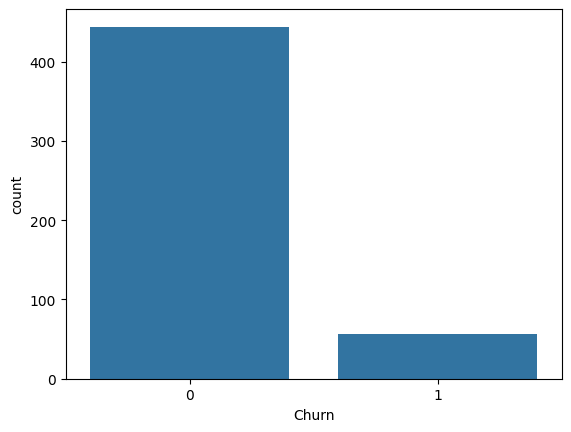

In [65]:
#churn distribution
sns.countplot(x='Churn',data=df)
plt.show()

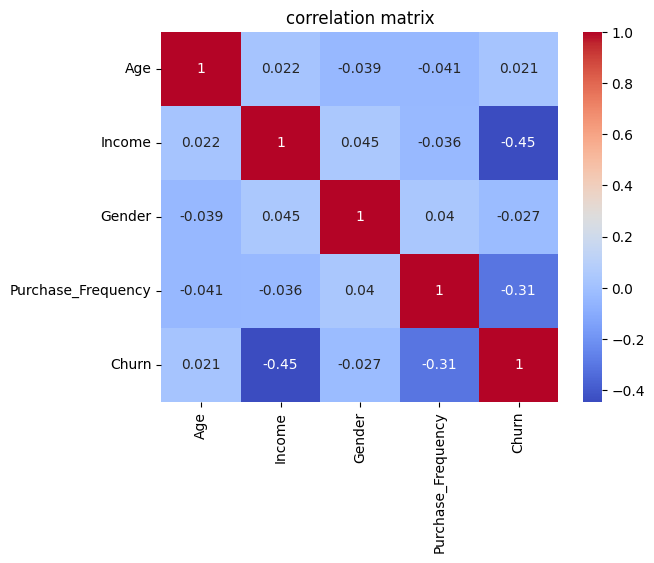

In [66]:
#correlation matrix
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

In [67]:
x=df.drop("Churn",axis=1)
y=df["Churn"]
#split into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#train model
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

Accuracy score: 0.92
Confusion matrix:
 [[86  4]
 [ 4  6]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.60      0.60      0.60        10

    accuracy                           0.92       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.92      0.92      0.92       100



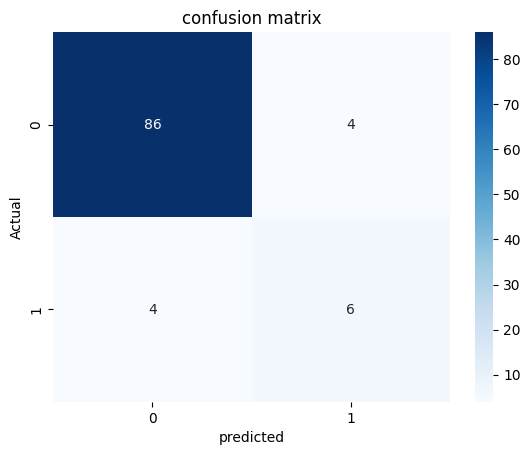

In [68]:

#predict
y_pred=model.predict(x_test)


#Accuracy
print("Accuracy score:",accuracy_score(y_test,y_pred))
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm)
#classification report
print(classification_report(y_test,y_pred))
#visualization confusion matrix
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()


In [74]:
#New sample customer
new_customer=pd.DataFrame({
    'Age':[28],
    'Income':[37],
    'Gender':[1],
    'Purchase_Frequency':[2]

})

#predict churn
prediction=model.predict(new_customer)[0]

#display prediction result with label
if prediction==1:
  print("This customer is likely to CHURN. consider offering retention benefits.")
else:
  print("this is likely to STAY. Continue engagement as usual.")

this is likely to STAY. Continue engagement as usual.
